In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data.shape

(4340, 8)

In [8]:
cars_name=data["name"].unique()
print("The Values in Deptname is:" , cars_name)

The Values in Deptname is: ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [9]:
Count_of_Car = data["name"].value_counts()
Count_of_Car = pd.DataFrame(Count_of_Car)

In [10]:
Count_of_Car

,count
name,
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35
...,...
Hyundai Verna Transform CRDi VGT SX ABS,1
Maruti S-Presso VXI Plus,1
Toyota Etios Liva 1.2 VX,1


In [11]:
print("Have any missing values\n" , data.isnull().values.any())

Have any missing values
 False


In [12]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [13]:
dup_values = data.duplicated().sum()

In [14]:
print("How many Duplicatid Values???\n" , "The number of Duplicated value is:" , dup_values)

How many Duplicatid Values???
 The number of Duplicated value is: 763


In [15]:
data = data.drop_duplicates()

In [16]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [17]:
print("How many Duplicatid Values???\n" , "The number of Duplicated value is:" , data.duplicated().sum())

How many Duplicatid Values???
 The number of Duplicated value is: 0


In [18]:
Most_10_Cars = data.sort_values(by='selling_price' , ascending=False).head(10)

In [19]:
Most_10_Cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3453,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
963,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner


In [20]:
least_10_Cars = data.sort_values(by='selling_price' , ascending=True).head(10)

In [21]:
least_10_Cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Petrol,Individual,Manual,Second Owner
2495,Ford Ikon 1.4 ZXi,2000,22000,42743,Petrol,Dealer,Manual,Third Owner
2444,Maruti 800 EX,2004,30000,60000,Petrol,Individual,Manual,Third Owner
3206,OpelCorsa 1.4 GL,2002,35000,100000,Petrol,Individual,Manual,Third Owner
1832,Tata Nano LX SE,2012,35000,35000,Petrol,Individual,Manual,Third Owner
2849,Tata Nano Std BSII,2009,35000,50000,Petrol,Individual,Manual,Third Owner
4290,Maruti 800 Std,2004,37500,90000,Petrol,Individual,Manual,Second Owner
877,Tata Nano Std,2011,40000,19000,Petrol,Individual,Manual,First Owner
3215,Maruti 800 AC,2004,40000,69111,Petrol,Individual,Manual,Third Owner
1350,Maruti 800 EX,2001,40000,30000,Petrol,Individual,Manual,First Owner


In [22]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [23]:
data["transmission"] = data["transmission"].replace({"Manual":0 , "Automatic":1})

C:\Users\motal\AppData\Local\Temp\ipykernel_20204\1909171953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transmission"] = data["transmission"].replace({"Manual":0 , "Automatic":1})


In [24]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,0,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,0,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,0,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,0,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,0,First Owner


In [25]:
sell_trans_relation = data[["transmission","selling_price"]].corr()

In [26]:
sell_trans_relation

,transmission,selling_price
transmission,1.000000,0.486269
selling_price,0.486269,1.000000


In [27]:
data["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [28]:
data["fuel"] = data["fuel"].replace({"Petrol":0 , "Diesel":1 , "CNG":2 ,"LPG":3 ,"Electric":4})

C:\Users\motal\AppData\Local\Temp\ipykernel_20204\2808744470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["fuel"] = data["fuel"].replace({"Petrol":0 , "Diesel":1 , "CNG":2 ,"LPG":3 ,"Electric":4})


In [29]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Individual,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Individual,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Individual,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,0,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Individual,0,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Individual,0,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Individual,0,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Individual,0,First Owner


In [30]:
sell_fuel_relation = data[["fuel","selling_price"]].corr()

In [31]:
sell_fuel_relation

,fuel,selling_price
fuel,1.000000,0.214007
selling_price,0.214007,1.000000


<Axes: xlabel='fuel', ylabel='selling_price'>

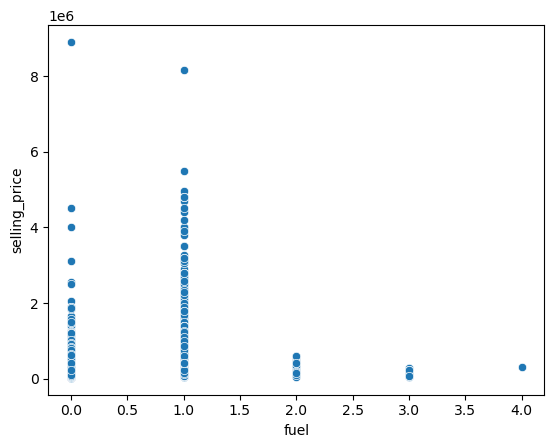

In [32]:
sns.scatterplot(x="fuel" , y="selling_price" , data=data)

In [33]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [34]:
data["owner"] = data["owner"].replace({"Test Drive Car":0 , "Fourth & Above Owner":1 , "Third Owner":2 ,"Second Owner":3 ,"First Owner":4 })

C:\Users\motal\AppData\Local\Temp\ipykernel_20204\1823745387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["owner"] = data["owner"].replace({"Test Drive Car":0 , "Fourth & Above Owner":1 , "Third Owner":2 ,"Second Owner":3 ,"First Owner":4 })


<Axes: xlabel='owner', ylabel='selling_price'>

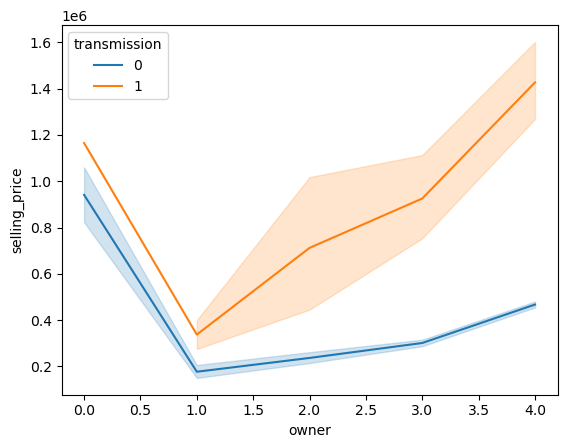

In [35]:
sns.lineplot(x="owner" , y="selling_price" , data=data, hue="transmission")

<Axes: xlabel='owner', ylabel='selling_price'>

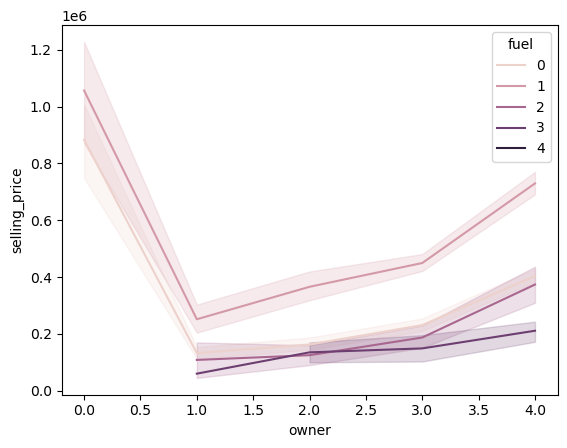

In [36]:
sns.lineplot(x="owner" , y="selling_price" , data=data, hue="fuel")


In [37]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Individual,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Individual,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,0,4
3,Datsun RediGO T Option,2017,250000,46000,0,Individual,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,0,3
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Individual,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Individual,0,3
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Individual,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Individual,0,4


In [38]:
sell_owner_relation = data[["owner","selling_price"]].corr()

In [39]:
sell_owner_relation

,owner,selling_price
owner,1.000000,0.201091
selling_price,0.201091,1.000000


In [40]:
sell_year_relation = data[["year","selling_price"]].corr()

In [41]:
sell_year_relation

,year,selling_price
year,1.00000,0.42426
selling_price,0.42426,1.00000


<Axes: xlabel='year', ylabel='selling_price'>

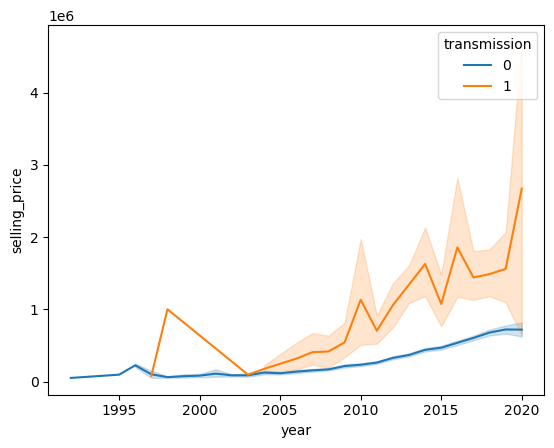

In [42]:
sns.lineplot(x="year" , y="selling_price" , data=data , hue="transmission")

<Axes: xlabel='km_driven', ylabel='selling_price'>

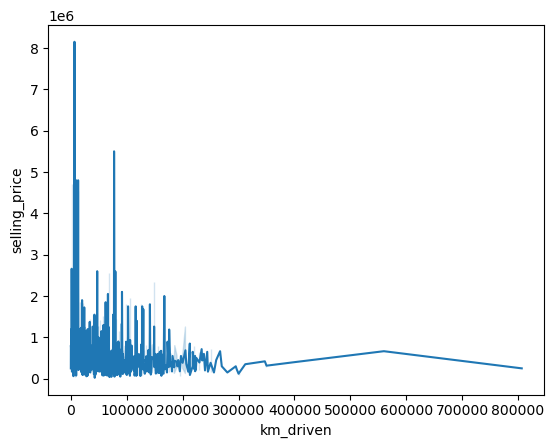

In [43]:
sns.lineplot(x="km_driven" , y="selling_price" , data=data )

In [44]:
sell_kmd_relation = data[["km_driven","selling_price"]].corr()

In [45]:
sell_kmd_relation

,km_driven,selling_price
km_driven,1.000000,-0.187359
selling_price,-0.187359,1.000000


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error

In [47]:
data=data.drop("seller_type" ,axis=1)

In [48]:
data

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,4
3,Datsun RediGO T Option,2017,250000,46000,0,0,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,3
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,3
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,4


In [49]:
x=data[["year" , "km_driven" ,"fuel"  , "transmission" ,"owner" ]] 
y=data["selling_price"]

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , shuffle=True)

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train ,y_train)

LinearRegression()

In [53]:
preds = model.predict(x_test)

In [54]:
preds

array([ 3.31357658e+05,  5.90269695e+05,  5.04771590e+05,  6.61366059e+05,
        5.73843361e+05,  7.31738069e+05,  5.10291942e+05,  1.23754074e+06,
        1.21835354e+06,  4.31310938e+05,  1.55337851e+05,  1.94432618e+04,
        5.37034505e+05,  4.99461730e+05,  5.08056856e+05,  2.81868285e+05,
        3.86381253e+05,  5.12052730e+05,  1.50988534e+05,  2.47134096e+05,
        5.69494045e+05,  5.27782326e+05,  6.39880415e+05,  5.19544121e+05,
        4.77371973e+05,  4.43598327e+05,  5.16862476e+05,  2.62563681e+05,
        5.23433009e+05,  5.34352859e+05,  1.28820115e+06, -5.77482237e+03,
        5.51489679e+05,  1.51188236e+06, -5.88183439e+05,  4.61338767e+05,
        3.01405598e+05,  1.66812630e+05,  5.49766673e+05,  4.38016074e+05,
        4.56149642e+05,  1.05991548e+05,  6.35673677e+05,  1.78938339e+05,
        4.81721290e+05,  4.64230906e+05,  5.10291942e+05,  1.31515421e+06,
        4.02807587e+05,  4.98147623e+05,  7.58626008e+05,  5.08003424e+05,
        5.07399803e+05,  

In [55]:
Y_true_pred=pd.DataFrame({
    "True":y_test , 
    "Preds":preds , 
    "Loss":y_test-preds
})

In [56]:
Y_true_pred

,True,Preds,Loss
83,650000,331357.658430,318642.341570
1470,530000,590269.694967,-60269.694967
2970,380000,504771.589551,-124771.589551
3008,650000,661366.059310,-11366.059310
3124,535000,573843.361259,-38843.361259
...,...,...,...
848,250000,324666.390995,-74666.390995
3168,120000,91786.431468,28213.568532
2781,515000,633045.463970,-118045.463970
169,400000,525721.527330,-125721.527330


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
x_scl = StandardScaler().fit_transform(x)

In [60]:
x_scl

array([[-1.40256584,  0.01575368, -0.97759589, -0.30912612,  0.67061738],
       [-1.40256584, -0.4046503 , -0.97759589, -0.30912612,  0.67061738],
       [-0.22641758,  0.64635965,  0.82120066, -0.30912612,  0.67061738],
       ...,
       [-0.93210654,  0.28901627, -0.97759589, -0.30912612, -0.62673166],
       [ 0.71450103,  0.43615766,  0.82120066, -0.30912612,  0.67061738],
       [ 0.71450103, -0.61485229, -0.97759589, -0.30912612,  0.67061738]])

In [61]:
y_log = np.log(y)

In [62]:
y_log

0       11.002100
1       11.813030
2       13.304685
3       12.429216
4       13.017003
          ...    
4335    12.923910
4336    12.923910
4337    11.608236
4338    13.670485
4339    12.323856
Name: selling_price, Length: 3577, dtype: float64

In [63]:
from xgboost import XGBRegressor

In [64]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x_scl,y_log , test_size=0.25 , shuffle=True)

In [65]:
XGB_model= XGBRegressor()

In [66]:
XGB_model.fit(x_train1 , y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
preds = XGB_model.predict(x_test1)

In [70]:
The_new_result=pd.DataFrame({
    "The True Values":y_test1 , 
    "The Predict Values":preds , 
    "The Loss": y_test1-preds
})

In [71]:
The_new_result

,The True Values,The Predict Values,The Loss
2209,11.608236,12.036812,-0.428576
3521,11.849398,11.536325,0.313073
3097,12.676076,13.025461,-0.349385
365,12.899220,13.017088,-0.117868
1072,13.199324,13.114934,0.084390
...,...,...,...
1452,12.206073,13.117729,-0.911657
235,12.611538,13.078458,-0.466920
219,12.367341,12.389714,-0.022373
1231,11.849398,12.259196,-0.409799


In [76]:
print("The Accuracy of our model is :  " , r2_score(y_test1 , preds)*100 , "%")

The Accuracy of our model is :   62.43656978937331 %


In [77]:
from lightgbm import LGBMRegressor

In [78]:
lgbm_model = LGBMRegressor()

In [79]:
lgbm_model.fit(x_train1 , y_train1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 2682, number of used features: 5
[LightGBM] [Info] Start training from score 12.745219


LGBMRegressor()

In [80]:
preds3 = lgbm_model.predict(x_test1)

In [81]:
The_new_result2=pd.DataFrame({
    "The True Values":y_test1 , 
    "The Predict Values":preds3 , 
    "The Loss": y_test1-preds3
})

In [82]:
The_new_result2

,The True Values,The Predict Values,The Loss
2209,11.608236,12.119995,-0.511760
3521,11.849398,11.600694,0.248703
3097,12.676076,13.073274,-0.397198
365,12.899220,12.995673,-0.096453
1072,13.199324,12.840468,0.358856
...,...,...,...
1452,12.206073,13.125591,-0.919518
235,12.611538,13.185090,-0.573553
219,12.367341,12.365583,0.001758
1231,11.849398,12.288559,-0.439161


In [83]:
print("The Accuracy of our model is :  " , r2_score(y_test1 , preds3)*100 , "%")

The Accuracy of our model is :   65.85034071667046 %
